# Selenium basic

In [28]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.service import Service

import time
import os
import urllib, requests

## query, driver 설정

- query, chrome driver 실행

In [29]:
#쿼리 선언, 드라이버 실행
query = '파인애플 사진'
#service = Service()
driver = webdriver.Chrome('C:/Users/iiile/Vscode_jupyter/data/chromedriver.exe')


c:\ProgramData\Anaconda3\envs\summer\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  after removing the cwd from sys.path.


- query 검색창에 추가

In [31]:
driver.get('https://www.google.co.kr//imghp?h1=ko')
keyword = driver.find_element_by_xpath('/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea')
keyword.send_keys(query)

driver.implicitly_wait(3)

c:\ProgramData\Anaconda3\envs\summer\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  


- query 검색 실행

In [32]:
driver.find_element_by_xpath('/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button').click()

#/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button
driver.implicitly_wait(3)

c:\ProgramData\Anaconda3\envs\summer\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  """Entry point for launching an IPython kernel.


In [33]:
#스크롤 내리기
elem = driver.find_element_by_tag_name('body')
for i in range(60):
    elem.send_keys(Keys.PAGE_DOWN)
    time.sleep(0.1)

try:
    driver.find_element_by_class_name('mye4qd').send_keys(Keys.ENTER)
    for i in range(60):
        elem.send_keys(Keys.PAGE_DOWN)
        time.sleep(0.1)
except:
    pass

c:\ProgramData\Anaconda3\envs\summer\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: find_element_by_tag_name is deprecated. Please use find_element(by=By.TAG_NAME, value=name) instead
  
c:\ProgramData\Anaconda3\envs\summer\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: find_element_by_class_name is deprecated. Please use find_element(by=By.CLASS_NAME, value=name) instead
  


## 이미지 수집

- 이미지 개수 파악

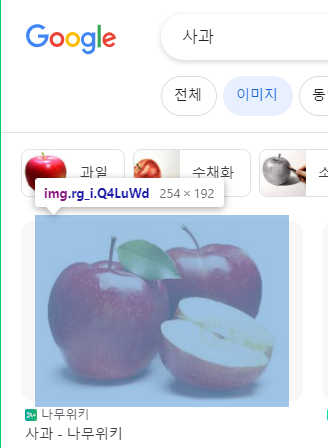
구글의 썸네일 이미지 class name - img.rg_i.Q4LuWd이므로 elements_by_css_selector로 요소 가져옴

In [34]:
links =[]

images = driver.find_elements_by_css_selector("img.rg_i.Q4LuWd")
for img in images:
    if img.get_attribute('src') != None:
        links.append(img.get_attribute('src'))
    elif img.get_attribute('data-src')!= None:
        links.append(img.get_attribute('data-src'))
    elif img.get_attribute('data-irul')!= None:
        links.append(img.get_attribute('data-irul'))

c:\ProgramData\Anaconda3\envs\summer\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
print(len(links))

816


- 이미지 다운

In [36]:
cnt = 0
for i in links:
    start = time.time()
    url = i
    os.makedirs(f"./{query}_img_download/", exist_ok=True)
    while True:
        try:
            urllib.request.urlretrieve(url, f"./{query}_img_download/{str(cnt)}_{query}.png")
            print(f"{str(cnt+1)} / {str(len(links))} / {query} / 다운로드시간: {str(time.time() - start)[:5]}초")
            break
        except urllib.error.HTTPError as e:
            print(f"HTTPError 발생 ({e}): 재시도...")
            time.sleep(5)
        except Exception as e:
            print(f"Error 발생 ({e}): 재시도...")
            time.sleep(5)
        if time.time() - start > 60:
            print(f"{query} download failed")
            break
    cnt += 1

print(f"{query} download complete")
driver.close()

1 / 816 / 파인애플 사진 / 다운로드시간: 0.001초
2 / 816 / 파인애플 사진 / 다운로드시간: 0.001초
3 / 816 / 파인애플 사진 / 다운로드시간: 0.000초
4 / 816 / 파인애플 사진 / 다운로드시간: 0.001초
5 / 816 / 파인애플 사진 / 다운로드시간: 0.0초
6 / 816 / 파인애플 사진 / 다운로드시간: 0.001초
7 / 816 / 파인애플 사진 / 다운로드시간: 0.001초
8 / 816 / 파인애플 사진 / 다운로드시간: 0.000초
9 / 816 / 파인애플 사진 / 다운로드시간: 0.000초
10 / 816 / 파인애플 사진 / 다운로드시간: 0.001초
11 / 816 / 파인애플 사진 / 다운로드시간: 0.000초
12 / 816 / 파인애플 사진 / 다운로드시간: 0.0초
13 / 816 / 파인애플 사진 / 다운로드시간: 0.001초
14 / 816 / 파인애플 사진 / 다운로드시간: 0.001초
15 / 816 / 파인애플 사진 / 다운로드시간: 0.001초
16 / 816 / 파인애플 사진 / 다운로드시간: 0.000초
17 / 816 / 파인애플 사진 / 다운로드시간: 0.000초
18 / 816 / 파인애플 사진 / 다운로드시간: 0.0초
19 / 816 / 파인애플 사진 / 다운로드시간: 0.001초
20 / 816 / 파인애플 사진 / 다운로드시간: 0.001초
21 / 816 / 파인애플 사진 / 다운로드시간: 0.218초
22 / 816 / 파인애플 사진 / 다운로드시간: 0.173초
23 / 816 / 파인애플 사진 / 다운로드시간: 0.170초
24 / 816 / 파인애플 사진 / 다운로드시간: 0.191초
25 / 816 / 파인애플 사진 / 다운로드시간: 0.189초
26 / 816 / 파인애플 사진 / 다운로드시간: 0.197초
27 / 816 / 파인애플 사진 / 다운로드시간: 0.165초
28 / 816 / 파인애플 사진 / 다운로드시간: 0.201초
29 / 81

## 이미지 정제

In [1]:
import os
#이미지 저장 경로
img_dir = './images/apple/'



In [44]:
#모든 파일 목록 가져오기 - oslistdir
file_list = sorted(os.listdir(img_dir))
print(file_list, '\n',len(file_list))


['0_빨간 사과.png', '0_사과.png', '100_빨간 사과.png', '101_사과.png', '102_빨간 사과.png', '102_사과.png', '103_빨간 사과.png', '103_사과.png', '104_빨간 사과.png', '104_사과.png', '105_빨간 사과.png', '105_사과.png', '106_사과.png', '107_사과.png', '108_빨간 사과.png', '108_사과.png', '109_빨간 사과.png', '109_사과.png', '10_빨간 사과.png', '10_사과.png', '110_사과.png', '111_빨간 사과.png', '111_사과.png', '112_빨간 사과.png', '113_사과.png', '114_사과.png', '115_사과.png', '116_사과.png', '117_빨간 사과.png', '117_사과.png', '118_빨간 사과.png', '118_사과.png', '119_사과.png', '11_빨간 사과.png', '11_사과.png', '120_사과.png', '121_빨간 사과.png', '122_빨간 사과.png', '122_사과.png', '123_빨간 사과.png', '123_사과.png', '124_빨간 사과.png', '124_사과.png', '125_사과.png', '126_사과.png', '127_사과.png', '128_빨간 사과.png', '128_사과.png', '12_빨간 사과.png', '12_사과.png', '131_사과.png', '132_빨간 사과.png', '132_사과.png', '133_사과.png', '134_사과.png', '136_사과.png', '137_사과.png', '138_빨간 사과.png', '138_사과.png', '139_사과.png', '13_빨간 사과.png', '13_사과.png', '140_사과.png', '142_빨간 사과.png', '145_빨간 사과.png', '146_사과.png', '149_빨간 사과.p

In [47]:
#oslist에서 sorted사용하면 정렬이 제대로 안됨.
#natsort 사용

from natsort import natsorted

img_dir = './images/apple/'
file_list_temp01 = natsort.natsorted(os.listdir(img_dir))
print(file_list_temp01)

['0_빨간 사과.png', '0_사과.png', '1_빨간 사과.png', '1_사과.png', '2_빨간 사과.png', '2_사과.png', '3_빨간 사과.png', '3_사과.png', '4_빨간 사과.png', '4_사과.png', '5_빨간 사과.png', '5_사과.png', '6_빨간 사과.png', '7_빨간 사과.png', '7_사과.png', '8_빨간 사과.png', '8_사과.png', '9_빨간 사과.png', '9_사과.png', '10_빨간 사과.png', '10_사과.png', '11_빨간 사과.png', '11_사과.png', '12_빨간 사과.png', '12_사과.png', '13_빨간 사과.png', '13_사과.png', '14_빨간 사과.png', '14_사과.png', '15_빨간 사과.png', '16_빨간 사과.png', '16_사과.png', '17_빨간 사과.png', '17_사과.png', '18_빨간 사과.png', '18_사과.png', '19_빨간 사과.png', '19_사과.png', '20_빨간 사과.png', '20_사과.png', '21_빨간 사과.png', '21_사과.png', '22_빨간 사과.png', '23_빨간 사과.png', '23_사과.png', '24_빨간 사과.png', '24_사과.png', '25_빨간 사과.png', '25_사과.png', '26_빨간 사과.png', '26_사과.png', '27_빨간 사과.png', '27_사과.png', '28_빨간 사과.png', '28_사과.png', '29_빨간 사과.png', '29_사과.png', '30_빨간 사과.png', '30_사과.png', '31_빨간 사과.png', '32_빨간 사과.png', '32_사과.png', '33_빨간 사과.png', '34_빨간 사과.png', '34_사과.png', '35_사과.png', '36_빨간 사과.png', '36_사과.png', '37_빨간 사과.png', '37_사과.png

In [46]:
#모든 파일 목록 가져오기 - glob.glob
import glob
#file_list_glob = glob.glob(os.path.join('./사과_img_download/',"*.png"))
#print(file_list_glob,'\n',len(file_list_glob))


"""
폴더구조
Web_crawling    
    images
        apple
        pineapple
'./images/*/*.png'
"""

from natsort import natsort
file_list_glob = natsort.natsorted(glob.glob(os.path.join('./images/*/',"*.png")))
print(file_list_glob,'\n',len(file_list_glob))

['./images\\apple\\0_빨간 사과.png', './images\\apple\\0_사과.png', './images\\apple\\1_빨간 사과.png', './images\\apple\\1_사과.png', './images\\apple\\2_빨간 사과.png', './images\\apple\\2_사과.png', './images\\apple\\3_빨간 사과.png', './images\\apple\\3_사과.png', './images\\apple\\4_빨간 사과.png', './images\\apple\\4_사과.png', './images\\apple\\5_빨간 사과.png', './images\\apple\\5_사과.png', './images\\apple\\6_빨간 사과.png', './images\\apple\\7_빨간 사과.png', './images\\apple\\7_사과.png', './images\\apple\\8_빨간 사과.png', './images\\apple\\8_사과.png', './images\\apple\\9_빨간 사과.png', './images\\apple\\9_사과.png', './images\\apple\\10_빨간 사과.png', './images\\apple\\10_사과.png', './images\\apple\\11_빨간 사과.png', './images\\apple\\11_사과.png', './images\\apple\\12_빨간 사과.png', './images\\apple\\12_사과.png', './images\\apple\\13_빨간 사과.png', './images\\apple\\13_사과.png', './images\\apple\\14_빨간 사과.png', './images\\apple\\14_사과.png', './images\\apple\\15_빨간 사과.png', './images\\apple\\16_빨간 사과.png', './images\\apple\\16_사과.png', './imag

In [2]:
#모든 파일 목록 가져오기 - os.walk
def get_img_path(root_path):    #하위 경로 모두 탐색
    file_paths = []
    for (path, dir, files) in os.walk(root_path):
        print('path:',path)
        print('dir:',dir)
        print('files:',files)

        for file in files:
            ext = os.path. splitext(file)[-1].lower()       #정렬
            formats = ['.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff']
            if ext in formats:
                file_path = os.path.join(path, file)
                file_paths.append(file_path)
    return file_paths

file_paths = get_img_path('./images/apple/')
print(file_paths)

path: ./images/apple/
dir: []
files: ['0_빨간 사과.png', '0_사과.png', '100_빨간 사과.png', '101_사과.png', '102_빨간 사과.png', '102_사과.png', '103_빨간 사과.png', '103_사과.png', '104_빨간 사과.png', '104_사과.png', '105_빨간 사과.png', '105_사과.png', '106_사과.png', '107_사과.png', '108_빨간 사과.png', '108_사과.png', '109_빨간 사과.png', '109_사과.png', '10_빨간 사과.png', '10_사과.png', '110_사과.png', '111_빨간 사과.png', '111_사과.png', '112_빨간 사과.png', '113_사과.png', '114_사과.png', '115_사과.png', '116_사과.png', '117_빨간 사과.png', '117_사과.png', '118_빨간 사과.png', '118_사과.png', '119_사과.png', '11_빨간 사과.png', '11_사과.png', '120_사과.png', '121_빨간 사과.png', '122_빨간 사과.png', '122_사과.png', '123_빨간 사과.png', '123_사과.png', '124_빨간 사과.png', '124_사과.png', '125_사과.png', '126_사과.png', '127_사과.png', '128_빨간 사과.png', '128_사과.png', '12_빨간 사과.png', '12_사과.png', '131_사과.png', '132_빨간 사과.png', '132_사과.png', '133_사과.png', '134_사과.png', '136_사과.png', '137_사과.png', '138_빨간 사과.png', '138_사과.png', '139_사과.png', '13_빨간 사과.png', '13_사과.png', '140_사과.png', '142_빨간 사과.png', '145_빨